# Understand the Data

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
import plotly.express as px  
import plotly.graph_objects as go  
import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Marvel vs DC\Marvel Vs DC NEW.csv '
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
824,824,Justice League,(2001â2004),"Animation,Action,Adventure",24 min,Diana makes friends with a flighty princess on...,7.4
627,627,Batman Beyond,(1999â2001),"Animation,Action,Adventure",22 min,Determined to bring his father's murderers to ...,8.4
1473,1473,Young Justice,(2010â ),"Animation,Action,Adventure",23 min,"Dick Grayson, Artemis Crock, Conner Kent and J...",8.7
1147,1147,Human Target,(2010â2011),"Action,Adventure,Crime",60 min,A English anthropologist accidentally discover...,8.0
1103,1103,20 to 1,(2005â2017),Documentary,0,Bert Newton counts down the most glamorous and...,0.0
122,122,Mutant X,(2001â2004),"Action,Adventure,Drama",43 min,The team tries to stop Eckhart from acquiring ...,6.5
770,770,The New Batman Adventures,(1997â1999),"Animation,Action,Adventure",22 min,Catwoman is pursued by a fanatical cat themed ...,7.0


In [3]:
df.size

11830

In [4]:
df.shape

(1690, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1690 non-null   object 
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 92.6+ KB


In [6]:
df.describe(include='all')

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
count,1690.000000,1690,1657,1683,1690,1690,1690.000000
unique,NaN,314,147,90,126,1571,NaN
top,NaN,Smallville,(2001â2011),"Animation,Action,Adventure",0,a Plot,NaN
freq,NaN,176,176,439,283,117,NaN
mean,844.500000,NaN,NaN,NaN,NaN,NaN,6.877337
std,488.005294,NaN,NaN,NaN,NaN,NaN,2.690564
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,422.250000,NaN,NaN,NaN,NaN,NaN,6.900000
50%,844.500000,NaN,NaN,NaN,NaN,NaN,7.800000
75%,1266.750000,NaN,NaN,NaN,NaN,NaN,8.400000


In [7]:
df.columns

Index(['ID', 'Movie', 'Year', 'Genre', 'RunTime', 'Description', 'IMDB_Score'], dtype='object')

# Data Cleaning 
- Create Two separate column for the StartYear, End Year from year column
- Find the Run Time in min 

<Axes: >

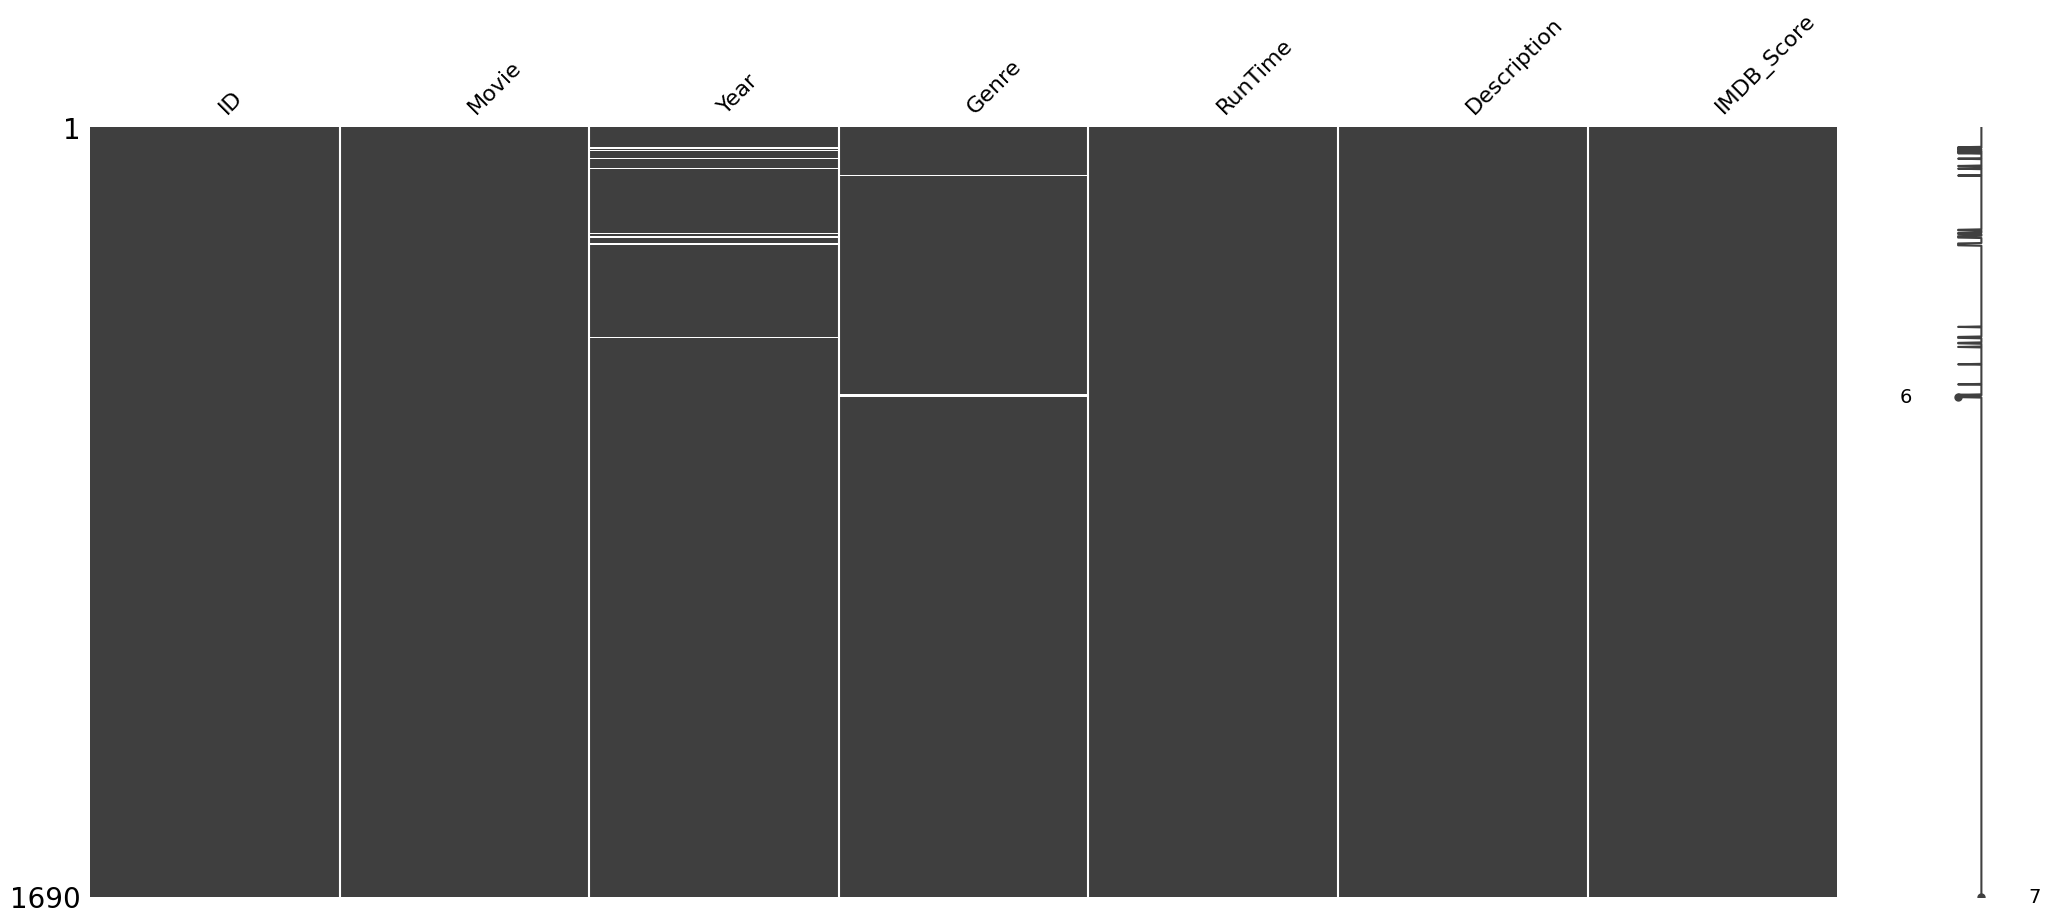

In [8]:
msno.matrix(df)

In [9]:
df.iloc[866]

ID                                                           866
Movie                                   Justice League Unlimited
Year                                               (2004â2006)
Genre                                 Animation,Action,Adventure
RunTime                                                   23 min
Description    When Circe changes Wonder Woman into a pig, Ba...
IMDB_Score                                                   7.8
Name: 866, dtype: object

In [10]:
type('RunTime')

str

In [11]:
df['RunTime'].sample(7)

392     122 min
956      43 min
108      43 min
1180          0
329      43 min
772      21 min
1617     51 min
Name: RunTime, dtype: object

In [12]:
df['RunTime(Min)'] = df['RunTime'].str.split(expand=True)[0]
df['RunTime(Min)'].sample(9)

430     45
856     22
818     24
1027    22
1284    42
827     22
441     82
1031    42
898     41
Name: RunTime(Min), dtype: object

In [13]:
df['Year'].sample(17)

339     (2013â2020)
998     (2001â2003)
901     (2001â2011)
1292    (2014â2019)
1392       (2016â )
1455       (1992â )
845     (2001â2004)
943     (2001â2011)
163     (2001â2004)
288     (2013â2020)
272     (2016â2018)
1158    (2001â2011)
31              -2013
239               NaN
1595    (2014â2019)
1252       (2010â )
984     (2001â2003)
Name: Year, dtype: object

In [14]:
# Extract starting and ending years using regex
df[['StartYear', 'EndYear']] = df['Year'].str.extract(r'(\d{4})[^\d]*(\d{4}| )')

# Clean up EndYear to handle cases with ' ' (no ending year)
df['EndYear'] = df['EndYear'].replace(' ', 'No End Year')

# Display the updated DataFrame
print(df[['Year', 'StartYear', 'EndYear']])

               Year StartYear      EndYear
0             -2021       NaN          NaN
1        (2021â )      2021  No End Year
2             -2021       NaN          NaN
3             -2021       NaN          NaN
4             -2021       NaN          NaN
...             ...       ...          ...
1685     (2016â )      2016  No End Year
1686  (2015â2021)      2015         2021
1687  (2015â2021)      2015         2021
1688  (2015â2021)      2015         2021
1689  (2015â2021)      2015         2021

[1690 rows x 3 columns]


In [15]:
df[['Year', 'StartYear', 'EndYear']].sample(8)


,Year,StartYear,EndYear
1592,(2015â2018),2015,2018
1381,(2014â2019),2014,2019
1443,(2015â2021),2015,2021
197,(2021â ),2021,No End Year
1489,(2010â ),2010,No End Year
1636,-2019,NaN,NaN
286,(2013â2020),2013,2020
1316,(2014â2019),2014,2019


In [16]:
df.columns

Index(['ID', 'Movie', 'Year', 'Genre', 'RunTime', 'Description', 'IMDB_Score',
       'RunTime(Min)', 'StartYear', 'EndYear'],
      dtype='object')

In [17]:
df.drop(columns={"Year","RunTime", "Description"}, inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

ID                0
Movie             0
Genre             7
IMDB_Score        0
RunTime(Min)      0
StartYear       180
EndYear         180
dtype: int64

# Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1690 non-null   int64  
 1   Movie         1690 non-null   object 
 2   Genre         1683 non-null   object 
 3   IMDB_Score    1690 non-null   float64
 4   RunTime(Min)  1690 non-null   object 
 5   StartYear     1510 non-null   object 
 6   EndYear       1510 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 92.6+ KB


In [21]:
df['Genre'].sample(8)

1278        Crime,Drama,Fantasy
112      Action,Adventure,Drama
176      Animation,Action,Drama
200     Action,Adventure,Comedy
201      Action,Adventure,Drama
1521           Comedy,Talk-Show
1437     Animation,Short,Action
1441      Comedy,Fantasy,Sci-Fi
Name: Genre, dtype: object

In [22]:
df['Movie'].unique()

array(['Eternals', 'Loki', 'The Falcon and the Winter Soldier',
       'WandaVision', 'Spider-Man: No Way Home', 'Black Widow',
       'Avengers: Endgame', 'Guardians of the Galaxy',
       'Thor: Love and Thunder', 'Spider-Man: Far from Home',
       'Thor: Ragnarok', 'Avengers: Infinity War', 'Black Panther',
       'Captain Marvel', 'Shang-Chi and the Legend of the Ten Rings',
       'Spider-Man: Homecoming', 'Avengers: Age of Ultron',
       'Captain America: The First Avenger',
       'Guardians of the Galaxy Vol. 2', 'Thor', 'Iron Man',
       'Captain America: Civil War', 'The Avengers',
       'Doctor Strange in the Multiverse of Madness', 'Brightburn',
       'Doctor Strange', 'Ant-Man', 'Captain America: The Winter Soldier',
       'Iron Man 3', 'What If...?', 'Black Panther: Wakanda Forever',
       'Thor: The Dark World', 'Iron Man 2', 'Spider-Man 3',
       'Ant-Man and the Wasp', 'The Incredible Hulk', 'Hawkeye',
       'Guardians of the Galaxy Vol. 3', 'The Marvels', 'Mo

### Find out the keywords and categories  

In [23]:
marvel_most_frequent_keywords = [
    "Iron Man", "Tony Stark", "Captain America", "Steve Rogers", "Thor", "Hulk", 
    "Bruce Banner", "Spider-Man", "Peter Parker", "Black Widow", "Natasha Romanoff", 
    "Doctor Strange", "Stephen Strange", "Black Panther", "T'Challa", "Ant-Man", 
    "Scott Lang", "Captain Marvel", "Carol Danvers", "Hawkeye", "Clint Barton", 
    "Scarlet Witch", "Wanda Maximoff", "Vision", "Loki", "Thanos", "Nick Fury", 
    "Star-Lord", "Peter Quill", "Gamora", "Rocket Raccoon", "Groot", "Deadpool", 
    "Wolverine", "Logan", "Silver Surfer", "Daredevil", "Matt Murdock", "Winter Soldier", 
    "Bucky Barnes", "Avengers", "Hero", "Villain", "Superpower", "Infinity", "Asgard", 
    "Shield", "Superhero", "Power", "Universe", "Battle", "Origin", "War", "Quantum", 
    "Multiverse", "Technology", "Transformation", "Alliance", "Legacy", "Time", 
    "Space", "Justice", "Wakanda", "Stark", "Mutant", "S.H.I.E.L.D.", "Gem", "Crossover", 
    "Team", "God", "Cosmic", "Destiny", "Drax", "Jessica Jones", "Luke Cage", 
    "X-Men", "Fantastic Four", "Venom", "Ghost Rider", "The Punisher", "The Eternals", 
    "Blade", "Hank Pym", "Magneto"
]


In [24]:
dc_most_frequent_keywords = [
    "Batman", "Superman", "Justice", "League", "Dark", "Knight", "Wonder Woman", 
    "Suicide Squad", "Man of Steel", "Gotham", "Green Lantern", "Flash", "Arrow", 
    "Titans", "Shazam", "Aquaman", "Joker", "Birds of Prey", "Vengeance", "Crisis", 
    "Return", "Rise", "Legends", "Hero", "Dawn", "Tomorrow", "Gods", "Power", 
    "World", "Origin", "Reign", "Son", "War", "Throne", "Watchmen", "Phantom", 
    "Enemy", "Universe", "Blood", "Redemption", "Doomsday", "Apocalypse", "End", 
    "Constantine", "Catwoman", "Jonah Hex", "Nightwing", "Robin", "Supergirl", 
    "Zatanna", "Swamp Thing", "Blue Beetle", "Black Adam", "Vixen", "Harley Quinn", 
    "Static Shock", "Hawkman", "Green Arrow", "Batgirl", "Superboy", "Darkseid", 
    "Deathstroke", "Lobo", "Spectre", "The Question", "Red Hood", "Lucifer", 
    "Steel", "Raven", "Huntress", "Booster Gold", "Mr. Terrific", "Black Canary", 
    "The Atom", "Martian Manhunter", "Dr. Fate", "Black Lightning", "Firestorm", 
    "Etrigan", "The Demon", "Orion", "Metamorpho", "Azrael", "Deadshot", 
    "Solomon Grundy", "Doctor Manhattan"
]


In [25]:
def dc_or_Marvel (title):
    for keyword in marvel_most_frequent_keywords:
        if keyword in title:
            return 'Marvel'
    for keyword in dc_most_frequent_keywords:
        if keyword in title:
            return 'DC'
    return 'Unknown'   
df['dc/marvel'] =df['Movie'].apply(dc_or_Marvel)
df.sample(7)

,ID,Movie,Genre,IMDB_Score,RunTime(Min),StartYear,EndYear,dc/marvel
1534,1534,DC Super Hero Girls,"Animation,Short,Action",0.0,0,2015,2018,Marvel
1400,1400,Lucifer,"Crime,Drama,Fantasy",9.1,43,2016,No End Year,DC
857,857,Justice League Unlimited,"Animation,Action,Adventure",8.6,24,2004,2006,Marvel
617,617,Batman Beyond,"Animation,Action,Adventure",6.5,22,1999,2001,DC
285,285,Agents of S.H.I.E.L.D.,"Action,Adventure,Drama",8.1,43,2013,2020,Marvel
872,872,Justice League,"Animation,Action,Adventure",7.3,22,2001,2004,Marvel
1478,1478,Young Justice,"Animation,Action,Adventure",9.1,24,2010,No End Year,Marvel


In [26]:
df['dc/marvel'].sample(7)

593     Unknown
1350         DC
702          DC
1512         DC
1033         DC
998     Unknown
1414     Marvel
Name: dc/marvel, dtype: object

##  Filter the Dataset based on score and unknown values  

In [27]:
df = df[(df['IMDB_Score'] != 0) & (df['dc/marvel'] != 'Unknown')]

In [28]:
df.sample(7)

,ID,Movie,Genre,IMDB_Score,RunTime(Min),StartYear,EndYear,dc/marvel
1407,1407,DC Super Hero Girls,"Animation,Short,Action",6.6,0,2015,2018,Marvel
1011,1011,The Batman,"Animation,Action,Adventure",7.4,22,2004,2008,DC
775,775,The New Batman Adventures,"Animation,Action,Adventure",8.2,22,1997,1999,DC
86,86,Iron Man & Hulk: Heroes United,"Animation,Action,Adventure",4.7,71,2013,No End Year,Marvel
467,467,Batman Begins,"Action,Adventure,Crime",8.2,0,2005,No End Year,DC
1658,1658,Supergirl,"Action,Adventure,Drama",6.9,42,2015,2021,DC
1253,1253,Young Justice,"Animation,Action,Adventure",8.5,22,2010,No End Year,Marvel


In [29]:
df.shape

(1160, 8)

## Number of Movies

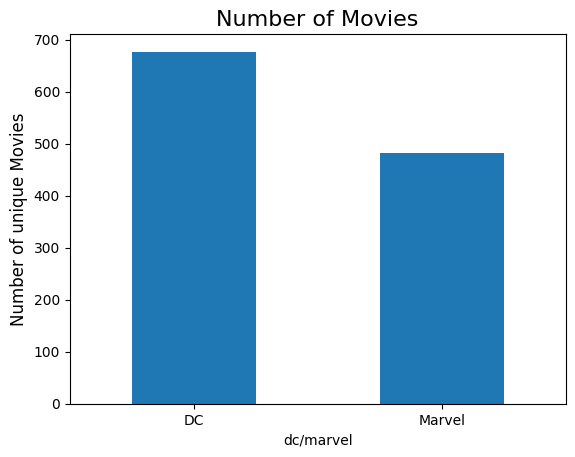

In [30]:
dc_marvel_count = df[df['dc/marvel'].isin(['DC', 'Marvel'])].groupby('dc/marvel')['ID'].count()

dc_marvel_count.plot(
    kind='bar')


plt.title('Number of Movies', fontsize=16)
plt.ylabel('Number of unique Movies', fontsize=12)
plt.xticks(rotation=0)
plt.show()

## IBDM  Ratings

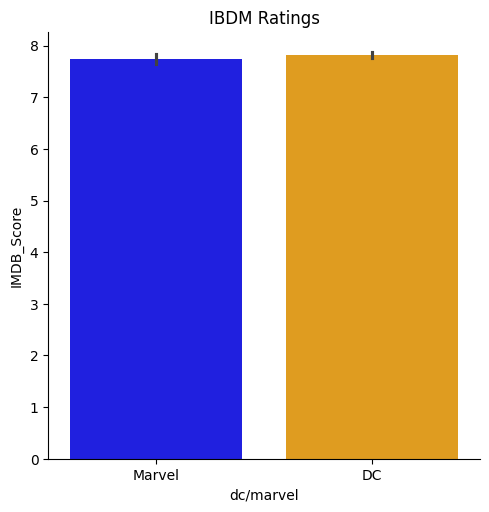

In [31]:
sns.catplot(
    data=df,
    kind='bar',
    x=df['dc/marvel'],
    y=df['IMDB_Score'],
    palette={'DC': 'orange', 'Marvel': 'blue'},
    
)

plt.title('IBDM Ratings')
plt.show()

## Number of Movies Produced by DC and Marvel Each Year

In [32]:
# Group by year for both DC and Marvel
dc_movie_count = df[df['dc/marvel'] == 'DC'].groupby('StartYear')['ID'].count().reset_index()
dc_movie_count.columns = ['Year', 'DC_MovieCount']

marvel_movie_count = df[df['dc/marvel'] == 'Marvel'].groupby('StartYear')['ID'].count().reset_index()
marvel_movie_count.columns = ['Year', 'Marvel_MovieCount']

# Merge the two DataFrames
movie_count_per_year = pd.merge(dc_movie_count, marvel_movie_count, on='Year', how='outer').fillna(0)
movie_count_per_year

,Year,DC_MovieCount,Marvel_MovieCount
0,1952,1.0,0.0
1,1979,1.0,0.0
2,1980,1.0,0.0
3,1982,1.0,0.0
4,1984,1.0,0.0
5,1985,1.0,1.0
6,1987,1.0,0.0
7,1988,1.0,0.0
8,1990,1.0,0.0
9,1991,1.0,0.0


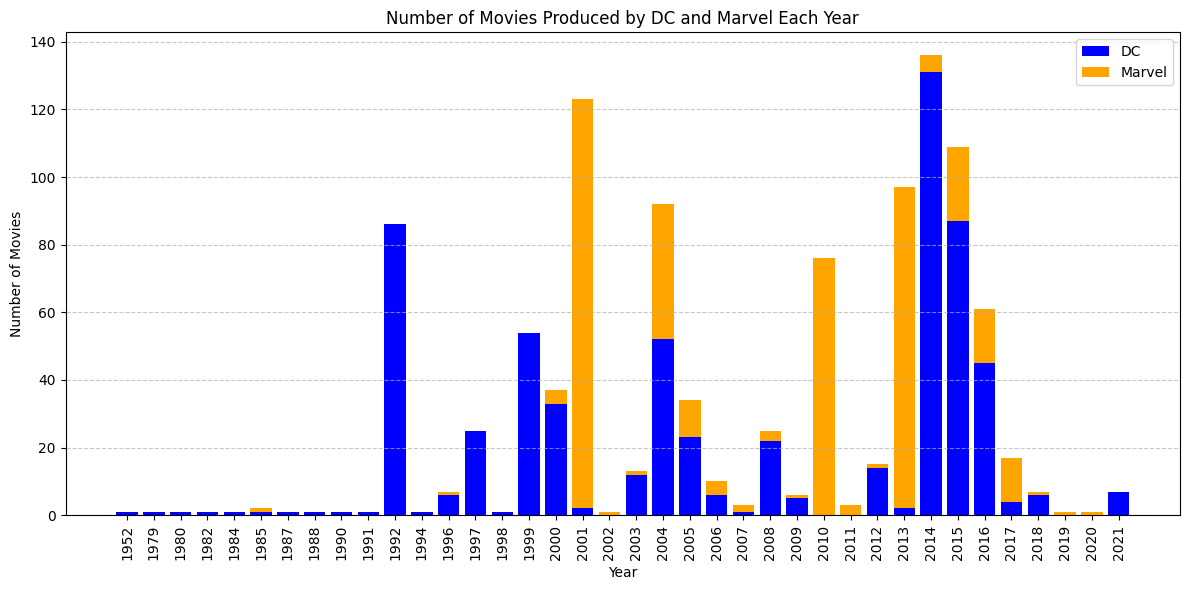

In [33]:
# Plotting stacked bar graph
plt.figure(figsize=(12, 6))

# Create a stacked bar plot
plt.bar(movie_count_per_year['Year'], movie_count_per_year['DC_MovieCount'], 
        color='blue', label='DC')
plt.bar(movie_count_per_year['Year'], movie_count_per_year['Marvel_MovieCount'], 
        bottom=movie_count_per_year['DC_MovieCount'], 
        color='orange', label='Marvel')

plt.title('Number of Movies Produced by DC and Marvel Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


## Genre

In [34]:
df_unique = df.drop_duplicates(subset='Movie')
df_unique['Genres_List'] = df_unique['Genre'].str.split(',')
df_exploded = df_unique.explode('Genres_List')

df_exploded_clean = df_exploded.dropna(subset=['Genres_List'])

df_exploded_clean = df_exploded_clean[df_exploded_clean['Genres_List'].str.strip() != '']

fig = px.treemap(
    df_exploded_clean, 
    path=['dc/marvel', 'Genres_List', 'Movie'],
    title='Marvel and DC film genres',
    hover_data=['IMDB_Score'], 
    color='IMDB_Score', 
    color_continuous_scale='ylorbr'
)

fig.show()

In [35]:
df.columns

Index(['ID', 'Movie', 'Genre', 'IMDB_Score', 'RunTime(Min)', 'StartYear',
       'EndYear', 'dc/marvel'],
      dtype='object')

## Runtime vs. IMDb Score

In [36]:
# Create a scatter plot for Runtime vs. IMDb Score
fig = px.scatter(
    df,
    x='RunTime(Min)',  # Runtime in minutes
    y='IMDB_Score',    # IMDb Score
    color='dc/marvel', # Color points by DC or Marvel
    title='Runtime vs. IMDb Score',
    labels={'RunTime(Min)': 'Runtime (Minutes)', 'IMDB_Score': 'IMDb Score'},
    hover_data=['Movie'],  # Show the movie title on hover
)


fig.show()


## Distribution of IMDb Scores

In [38]:
df_unique['IMDB_Score'] = pd.to_numeric(df_unique['IMDB_Score'], errors='coerce')
df_unique['RunTime(Min)'] = pd.to_numeric(df_unique['RunTime(Min)'], errors='coerce')

# Drop rows with NaN values in 'IMDB_Score' or 'RunTime(Min)'
df_unique_cleaned = df_unique.dropna(subset=['IMDB_Score', 'RunTime(Min)'])

# size
plt.figure(figsize=(12, 7))
# Create the scatter plot
fig = px.scatter(
    df_unique_cleaned,
    x='StartYear',
    y='IMDB_Score',
    size='RunTime(Min)', 
    size_max=40,
    color='dc/marvel',
    hover_name='Movie',
    title='Duration and IMDb Rating for Marvel and DC Films'
)

# Show the plot
fig.show()

<Figure size 1200x700 with 0 Axes>

## Inspiration 🧑‍💻 [Link](https://www.kaggle.com/code/timurkhabirovich/marvel-vs-dc-networked)